In [1]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('../data/HI-Small_Trans.csv')

In [65]:
print(df['Is Laundering'].value_counts())
print(df['Is Laundering'].value_counts(normalize=True))

0    5073168
1       5177
Name: Is Laundering, dtype: int64
0    0.998981
1    0.001019
Name: Is Laundering, dtype: float64


In [66]:
# randomly select 75000 rows
# df = df.sample(n=75000, random_state=1)

In [67]:
print(df['Is Laundering'].value_counts())
print(df['Is Laundering'].value_counts(normalize=True))

0    5073168
1       5177
Name: Is Laundering, dtype: int64
0    0.998981
1    0.001019
Name: Is Laundering, dtype: float64


# Preprocess and Feature Engineering

In [68]:
X = df.drop(['Is Laundering'], axis=1)
y = df['Is Laundering']

from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.05

ros = RandomUnderSampler(sampling_strategy=sampling_strategy)

X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df = df_resampled

In [69]:
X.shape

(5078345, 10)

In [70]:
y_resampled.value_counts()

0    103540
1      5177
Name: Is Laundering, dtype: int64

In [71]:
df['day'] = pd.to_datetime(df['Timestamp']).dt.day
df['month'] = pd.to_datetime(df['Timestamp']).dt.month
df['year'] = pd.to_datetime(df['Timestamp']).dt.year
df['is_weekend'] = pd.to_datetime(df['Timestamp']).dt.dayofweek.apply(lambda x: 1 if x > 4 else 0)
df['day_of_week'] = pd.to_datetime(df['Timestamp']).dt.dayofweek
df['quarter'] = pd.to_datetime(df['Timestamp']).dt.quarter

In [72]:
import numpy as np

df['log_amount_received'] = df['Amount Received'].apply(lambda x: np.log(x))
df['log_amount_paid'] = df['Amount Paid'].apply(lambda x: np.log(x))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_amount_received'] = scaler.fit_transform(df['Amount Received'].values.reshape(-1,1))
df['scaled_amount_paid'] = scaler.fit_transform(df['Amount Paid'].values.reshape(-1,1))

In [73]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,...,day,month,year,is_weekend,day_of_week,quarter,log_amount_received,log_amount_paid,scaled_amount_received,scaled_amount_paid
2268209,2022/09/04 21:39,26,800092250,220572,8085DDC30,75.37,UK Pound,75.37,UK Pound,Cheque,...,4,9,2022,1,6,3,4.322409,4.322409,1.203925e-10,1.203925e-10
2112305,2022/09/04 02:47,795,80077E130,1412,801009AF0,233.38,US Dollar,233.38,US Dollar,ACH,...,4,9,2022,1,6,3,5.452668,5.452668,3.727904e-10,3.727904e-10
303959,2022/09/01 00:18,143598,8103528A0,143598,8103528A0,9670.93,Shekel,9670.93,Shekel,Reinvestment,...,1,9,2022,0,3,3,9.176880,9.176880,1.544789e-08,1.544789e-08
2754270,2022/09/05 23:19,9417,80391F6D0,3,80790CA30,292.05,Yuan,292.05,Yuan,Cheque,...,5,9,2022,0,0,3,5.676925,5.676925,4.665071e-10,4.665071e-10
928377,2022/09/01 18:03,70,100428930,235551,80D908710,24739.44,Brazil Real,24739.44,Brazil Real,Cheque,...,1,9,2022,0,3,3,10.116154,10.116154,3.951763e-08,3.951763e-08


In [74]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering', 'day', 'month',
       'year', 'is_weekend', 'day_of_week', 'quarter', 'log_amount_received',
       'log_amount_paid', 'scaled_amount_received', 'scaled_amount_paid'],
      dtype='object')

In [75]:
df['daily_tx_count_of_Account'] = df.groupby(['Account', 'day', 'month'])['Amount Paid'].transform('count')
df['daily_tx_count_of_Account.1'] = df.groupby(['Account.1', 'day', 'month'])['Amount Paid'].transform('count')

df['weekly_tx_count_of_Account'] = df.groupby(['Account', 'day_of_week', 'month'])['Amount Paid'].transform('count')
df['weekly_tx_count_of_Account.1'] = df.groupby(['Account.1', 'day_of_week', 'month'])['Amount Paid'].transform('count')

df['monthly_tx_count_of_Account'] = df.groupby(['Account', 'month'])['Amount Paid'].transform('count')
df['monthly_tx_count_of_Account.1'] = df.groupby(['Account.1', 'month'])['Amount Paid'].transform('count')

In [76]:
df['daily_tx_amount_of_Account'] = df.groupby(['Account', 'day', 'month'])['Amount Paid'].transform('sum')
df['daily_tx_amount_of_Account.1'] = df.groupby(['Account.1', 'day', 'month'])['Amount Paid'].transform('sum')

df['weekly_tx_amount_of_Account'] = df.groupby(['Account', 'day_of_week', 'month'])['Amount Paid'].transform('sum')
df['weekly_tx_amount_of_Account.1'] = df.groupby(['Account.1', 'day_of_week', 'month'])['Amount Paid'].transform('sum')

df['monthly_tx_amount_of_Account'] = df.groupby(['Account', 'month'])['Amount Paid'].transform('sum')
df['monthly_tx_amount_of_Account.1'] = df.groupby(['Account.1', 'month'])['Amount Paid'].transform('sum')

In [77]:
df['scaled_daily_tx_amount_of_Account'] = MinMaxScaler().fit_transform(df['daily_tx_amount_of_Account'].values.reshape(-1,1))
df['scaled_daily_tx_amount_of_Account.1'] = MinMaxScaler().fit_transform(df['daily_tx_amount_of_Account.1'].values.reshape(-1,1))

df['scaled_weekly_tx_amount_of_Account'] = MinMaxScaler().fit_transform(df['weekly_tx_amount_of_Account'].values.reshape(-1,1))
df['scaled_weekly_tx_amount_of_Account.1'] = MinMaxScaler().fit_transform(df['weekly_tx_amount_of_Account.1'].values.reshape(-1,1))

df['scaled_monthly_tx_amount_of_Account'] = MinMaxScaler().fit_transform(df['monthly_tx_amount_of_Account'].values.reshape(-1,1))
df['scaled_monthly_tx_amount_of_Account.1'] = MinMaxScaler().fit_transform(df['monthly_tx_amount_of_Account.1'].values.reshape(-1,1))

In [78]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering', 'day', 'month',
       'year', 'is_weekend', 'day_of_week', 'quarter', 'log_amount_received',
       'log_amount_paid', 'scaled_amount_received', 'scaled_amount_paid',
       'daily_tx_count_of_Account', 'daily_tx_count_of_Account.1',
       'weekly_tx_count_of_Account', 'weekly_tx_count_of_Account.1',
       'monthly_tx_count_of_Account', 'monthly_tx_count_of_Account.1',
       'daily_tx_amount_of_Account', 'daily_tx_amount_of_Account.1',
       'weekly_tx_amount_of_Account', 'weekly_tx_amount_of_Account.1',
       'monthly_tx_amount_of_Account', 'monthly_tx_amount_of_Account.1',
       'scaled_daily_tx_amount_of_Account',
       'scaled_daily_tx_amount_of_Account.1',
       'scaled_weekly_tx_amount_of_Account',
       'scaled_weekly_tx_amount_of_Account.1',
       'scaled_monthly_tx_amount_of_A

In [79]:
X = df[['day', 'month', 'year', 'is_weekend', 'day_of_week', 'quarter', 'log_amount_received', 'log_amount_paid', 'scaled_amount_received', 'scaled_amount_paid',
        'daily_tx_count_of_Account', 'daily_tx_count_of_Account.1', 'weekly_tx_count_of_Account', 'weekly_tx_count_of_Account.1', 'monthly_tx_count_of_Account', 
        'monthly_tx_count_of_Account.1', 'scaled_daily_tx_amount_of_Account', 'scaled_daily_tx_amount_of_Account.1', 'scaled_weekly_tx_amount_of_Account',
        'scaled_weekly_tx_amount_of_Account.1', 'scaled_monthly_tx_amount_of_Account', 'scaled_monthly_tx_amount_of_Account.1']]
y = df['Is Laundering']

In [80]:
columns_to_one_hot_encode = ['Receiving Currency', 'Payment Currency', 'Payment Format']


# one hot encode the columns in the list above and store the results in a new dataframe
dummies_df = pd.get_dummies(df[columns_to_one_hot_encode], columns=columns_to_one_hot_encode)
X = pd.concat([X, dummies_df], axis=1)

In [81]:
df.to_csv('../data/IBM our method.csv', index=False)

In [82]:
columns = X.columns
columns.shape

(59,)

# Model and Train

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch
import torch.nn as nn
import torch.optim as optim

In [84]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(59, 29),  # Encode_1: 47 -> 24
            nn.Tanh(),
            nn.Linear(29, 14),  # Encode_2: 24 -> 12
            nn.ReLU(),
            nn.Linear(14, 7),  # Encode_3: 12 -> 6
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(7, 14),  # Decode_1: 1 -> 2
            nn.Tanh(),
            nn.Linear(14, 29),  # Decode_2: 2 -> 4
            nn.ReLU(),
            nn.Linear(29, 59),  # Decode_3: 4 -> 8
            nn.LeakyReLU()      # Model_Output layer: Producing outputs in [0,1]
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [85]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels, _, test_idx = train_test_split(X, y, X.index, test_size=0.25)

# Filter training data to only include normal transactions
normal_train_data = train_data[train_labels == 0] # Assuming 0 means normal

train_tensor = torch.tensor(normal_train_data.values, dtype=torch.float32)
test_tensor = torch.tensor(test_data.values, dtype=torch.float32)


batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [86]:
lambda_reg = 1e-3

# Model initialization
model = Autoencoder()

# Choice of loss
loss_type = 'MSE'  # Choose between 'MSE' and 'BCE'
if loss_type == 'MSE':
    criterion = nn.MSELoss()  # Mean squared error loss
else:
    criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss. Use if you have a sigmoid activation in the output layer.

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Early stopping setup
best_loss = float('inf')
patience = 10
epochs_without_improvement = 0

# Training loop with early stopping
num_epochs = 100

loss_values = []
test_loss_values = []
reconstruction_errors = []

In [87]:
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch in train_dataloader:
        inputs = batch[0]

        # Zero the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        mse_loss = criterion(outputs, inputs)
        
        # 3. Activity Regularizer
        # Assuming the first layer of the encoder is model.encoder[0]
        activity_regularizer = lambda_reg * torch.norm(model.encoder[0](inputs), 1)
        
        # Combining the regularized loss
        total_loss = mse_loss + activity_regularizer

        # Backward pass and optimization
        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()

    epoch_loss = epoch_loss / len(train_dataloader)

    # Save the loss value for plotting
    loss_values.append(epoch_loss)


    # Test the model
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for batch in test_dataloader:
            inputs = batch[0]
            outputs = model(inputs)
            mse_loss = criterion(outputs, inputs)
            test_loss += mse_loss.item()

            batch_errors = torch.sum((outputs - inputs) ** 2, dim=1).numpy() # Sum of squared differences for each sample
            reconstruction_errors.extend(batch_errors)

        test_loss = test_loss / len(test_dataloader)
        test_loss_values.append(test_loss)

    model.train()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}")


    # Early stopping check
    if epoch_loss + 1e-5 < best_loss:
        best_loss = epoch_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement == patience:
        print("Early stopping due to no improvement in loss.")
        break

Epoch [1/100], Train Loss: 10329.6163, Test Loss: 9436.1395
Epoch [2/100], Train Loss: 9087.2842, Test Loss: 9446.1029
Epoch [3/100], Train Loss: 9075.3861, Test Loss: 9470.0041
Epoch [4/100], Train Loss: 9070.4340, Test Loss: 9425.8670
Epoch [5/100], Train Loss: 9070.8809, Test Loss: 9421.6679
Epoch [6/100], Train Loss: 9058.3398, Test Loss: 9404.1576
Epoch [7/100], Train Loss: 9048.0411, Test Loss: 9422.0726
Epoch [8/100], Train Loss: 9051.5804, Test Loss: 9420.6327
Epoch [9/100], Train Loss: 9048.9276, Test Loss: 9412.2821
Epoch [10/100], Train Loss: 9046.8906, Test Loss: 9396.1605
Epoch [11/100], Train Loss: 9049.7671, Test Loss: 9398.5253
Epoch [12/100], Train Loss: 9045.6900, Test Loss: 9435.5961
Epoch [13/100], Train Loss: 9043.2970, Test Loss: 9396.3224
Epoch [14/100], Train Loss: 9044.5965, Test Loss: 9402.7848
Epoch [15/100], Train Loss: 9042.6810, Test Loss: 9457.1494
Epoch [16/100], Train Loss: 9037.5989, Test Loss: 9404.4082
Epoch [17/100], Train Loss: 9039.2814, Test Loss

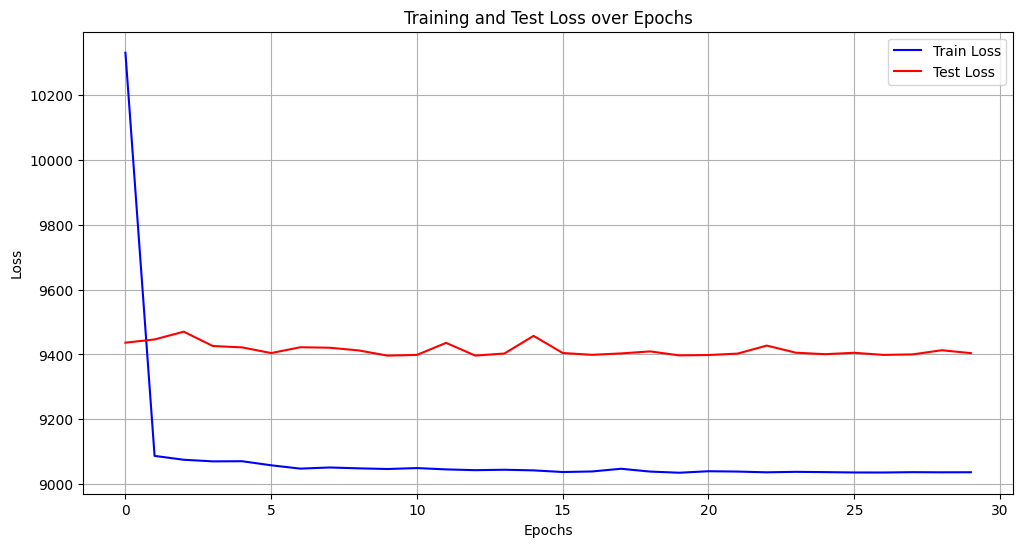

In [88]:
# Plotting the training and test losses
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label="Train Loss", color="blue")
plt.plot(test_loss_values, label="Test Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

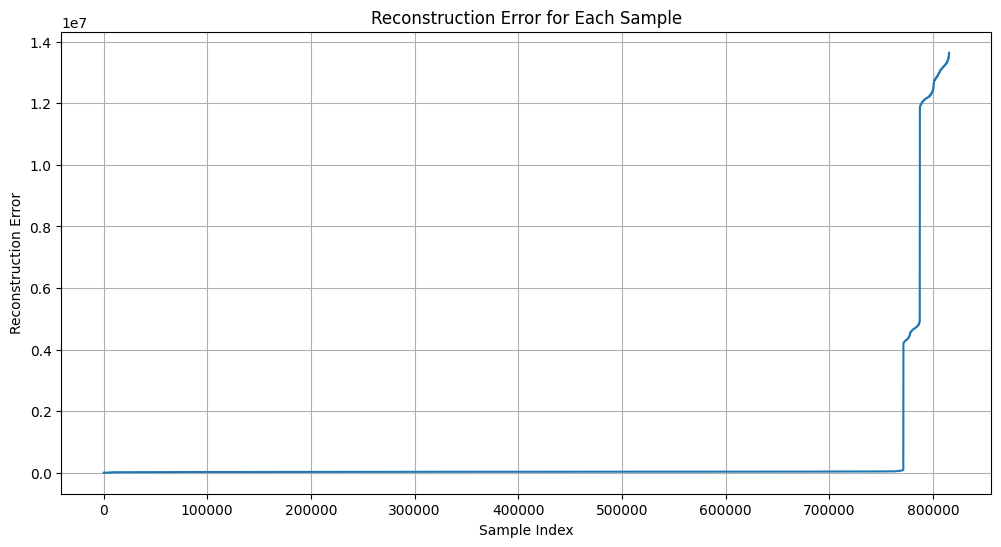

In [89]:
# sort and plot the reconstruction errors
reconstruction_errors.sort()
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors)
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Each Sample")
plt.grid(True)

In [90]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve

# Reconstruct the test data
with torch.no_grad():
    reconstructed_test = model(test_tensor).numpy()

In [91]:
# Calculate reconstruction error
reconstruction_errors = np.mean(np.power(test_data - reconstructed_test, 2), axis=1)

# Choose a threshold based on domain knowledge, the distribution of reconstruction errors, or via a validation set.
threshold = np.percentile(reconstruction_errors, 98)  # e.g., 99th percentile as threshold. This is a naive approach; refine based on your needs.

# Convert reconstruction errors into binary labels (0 or 1)
predicted_labels = [1 if error > threshold else 0 for error in reconstruction_errors]

# Convert reconstruction errors into probabilities between 0 and 1
predicted_probabilities = (reconstruction_errors - min(reconstruction_errors)) / (max(reconstruction_errors) - min(reconstruction_errors))

# Assuming df has a 'reported' column with true labels
true_labels = df['Is Laundering'].loc[test_data.index].values

In [92]:
# Calculate metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Calculate FPR
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
fpr = fp / (fp + tn)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'False Positive Rate (FPR): {fpr:.4f}')

F1 Score: 0.0465
Precision: 0.0772
Recall: 0.0333
Accuracy: 0.9366
ROC AUC: 0.5069
False Positive Rate (FPR): 0.0194


In [32]:
# Calculate metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Calculate FPR
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
fpr = fp / (fp + tn)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'False Positive Rate (FPR): {fpr:.4f}')

F1 Score: 0.0099
Precision: 0.0053
Recall: 0.0667
Accuracy: 0.9786
ROC AUC: 0.5234
False Positive Rate (FPR): 0.0199


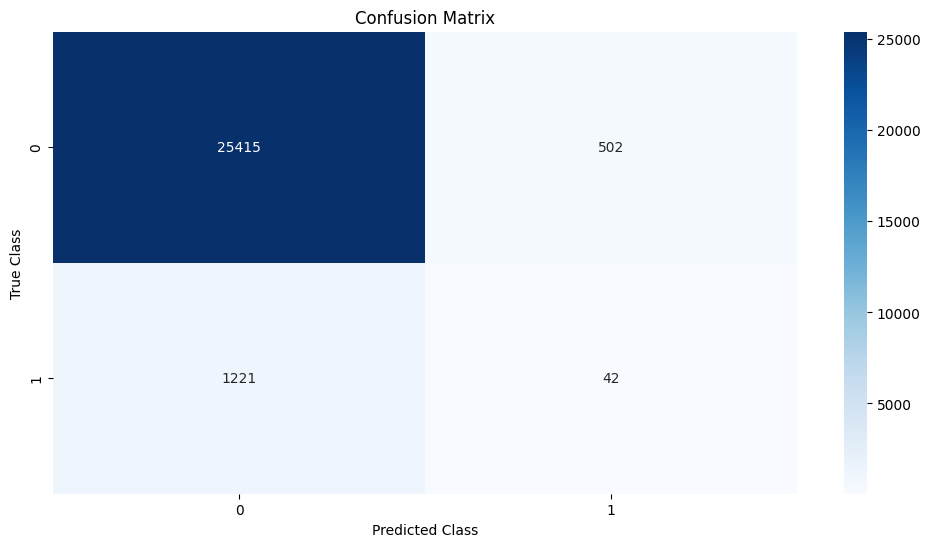

In [93]:
    # heatmap of confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

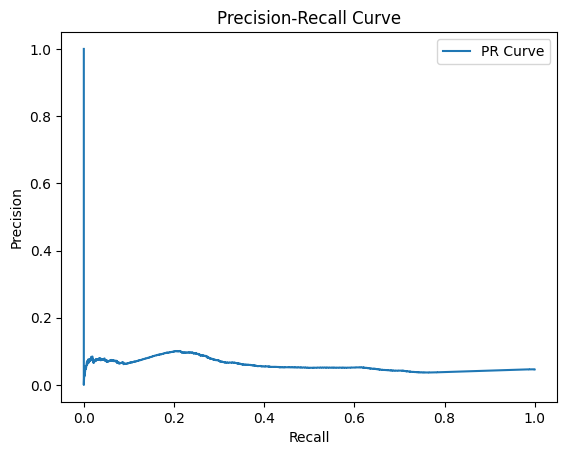

In [94]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve


# 1. PR Curve
precision_vals, recall_vals, _ = precision_recall_curve(true_labels, predicted_probabilities)
plt.figure()
plt.plot(recall_vals, precision_vals, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

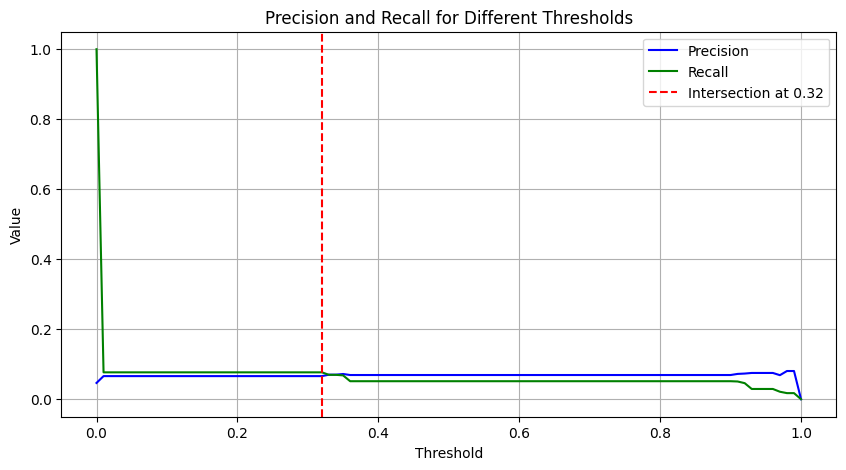

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Assuming the other parts of your code, where you compute `predicted_probabilities` and `true_labels`, are above this

# List to store precision and recall values for each threshold
precisions = []
recalls = []

# Iterate over a range of thresholds (e.g., from 0 to 1 with a step of 0.01)
thresholds = np.arange(0, 1.01, 0.01)  # Adjust the range and step as needed

for threshold in thresholds:
    # Calculate predicted labels for this threshold
    predicted_labels_threshold = [1 if error > threshold else 0 for error in predicted_probabilities]
    
    # Avoiding a scenario where there's a perfect precision or recall which can cause "UndefinedMetricWarning"
    if len(np.unique(predicted_labels_threshold)) > 1:
        # Compute precision and recall
        precision = precision_score(true_labels, predicted_labels_threshold)
        recall = recall_score(true_labels, predicted_labels_threshold)
    else:
        precision, recall = 0, 0

    precisions.append(precision)
    recalls.append(recall)

# Find the threshold where precision and recall cross
diffs = np.array(precisions) - np.array(recalls)
cross_points = np.where(np.diff(np.sign(diffs)))[0]  # Where the difference changes sign

# Plot
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')

# If there's an intersection point, plot it
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]
    plt.axvline(x=cross_threshold, color='red', linestyle='--', label=f'Intersection at {cross_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [96]:
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]

    # Use the cross_threshold to convert predicted_probabilities into binary labels
    predicted_labels_cross_threshold = [1 if prob > cross_threshold else 0 for prob in predicted_probabilities]

    # Calculate metrics
    f1 = f1_score(true_labels, predicted_labels_cross_threshold)
    precision = precision_score(true_labels, predicted_labels_cross_threshold)
    recall = recall_score(true_labels, predicted_labels_cross_threshold)
    accuracy = accuracy_score(true_labels, predicted_labels_cross_threshold)
    roc_auc = roc_auc_score(true_labels, predicted_probabilities)

    # Calculate FPR
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels_cross_threshold).ravel()
    fpr = fp / (fp + tn)

    # Print out the metrics
    print(f'\nMetrics for threshold = {cross_threshold:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'False Positive Rate (FPR): {fpr:.4f}')


Metrics for threshold = 0.3200
F1 Score: 0.0710
Precision: 0.0660
Recall: 0.0768
Accuracy: 0.9066
ROC AUC: 0.5079
False Positive Rate (FPR): 0.0529
